In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import os

plt.rcParams['figure.figsize'] = [16, 8]

In [2]:
path_obs = os.path.join('..', 'data', 'ovariancancer_obs.csv')
obs = np.loadtxt(path_obs, delimiter=',')

path_grp = os.path.join('..','data','ovariancancer_grp.csv')
with open(path_grp, 'r') as f:
    grp = np.array(f.read().split('\n'))

grp = grp[:obs.shape[0]]
print(obs.shape, grp.shape)

(216, 4000) (216,)


In [3]:
# economy SVD
B = obs
U, s, VT = np.linalg.svd(B, full_matrices=False)
S = np.diag(s)
print(U.shape, s.shape, VT.shape)

(216, 216) (216,) (216, 4000)


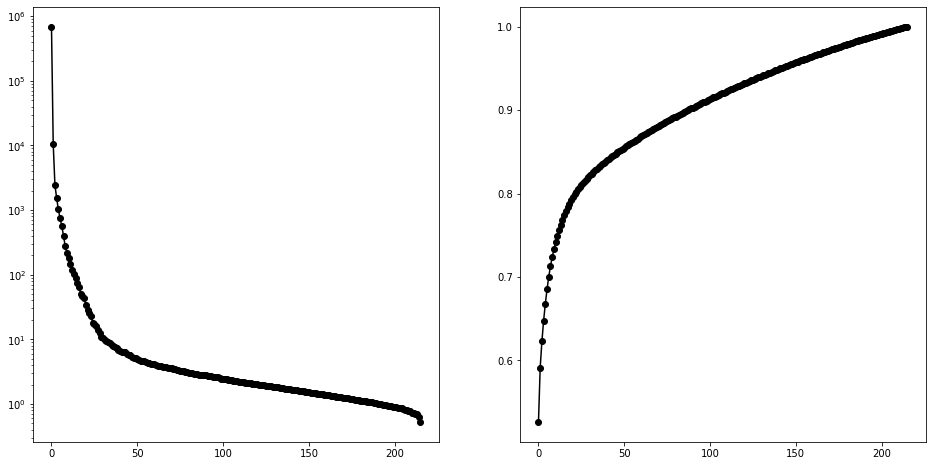

In [31]:
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.semilogy(s**2,'-o',color='k')
ax2 = fig.add_subplot(122)
ax2.plot(np.cumsum(s)/np.sum(s),'-o',color='k')
plt.show()

In [28]:
# top 3 principal components
T3 = VT[:3,:] @ B.T
# T = (B @ VT.T).T
# T3 = T[:3, :]
print(T3.shape)

(3, 216)


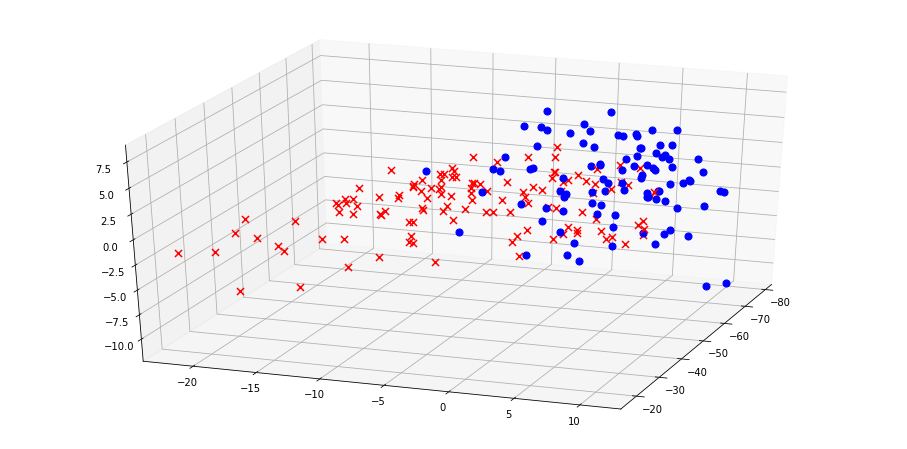

In [29]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for j in range(obs.shape[0]):
    if grp[j] == 'Cancer':
        ax.scatter(T3[0,j], T3[1,j], T3[2,j], marker='x',c='r',s=50)
    else:
        ax.scatter(T3[0,j], T3[1,j], T3[2,j], marker='o',c='b',s=50)

ax.view_init(30, 20)
plt.show()